# Building a Fraud Detection System within the Financial Sector

## Project Preview
---

According to INTERPOL's (2024) assessment, regions such as West and Southern Africa have seen an increase in romance baiting frauds, while Asia has become a focal point for telecommunication frauds where perpetrators impersonate law enforcement or bank officials to extract financial information from victims.Among financial institutions, commercial banks and health insurers have been notably affected by fraud. Additionally, identity fraud has emerged as a predominant threat, accounting for 45% of all adverse contributions reported by banks and financial service providers in 2023, with projections suggesting it could reach 50% by the end of the year,(Retain Banker International, 2024). Interpol (2024) states that causes of fraud in commercial banks and financial institutions are multifaceted. The increased use of technology has enabled organized crime groups to conduct sophisticated fraud campaigns at relatively low costs. Moreover, PYMNTS (2024) indicates the rise in scam-related frauds, particularly those exploiting consumer trust through social engineering, has led to a 56% increase in such incidents in 2024, surpassing traditional digital payment crimes. Regarding transaction methods, scams have become the leading form of fraud, surpassing digital payment fraud. The share of scam-related fraud increased by 56% in 2024, with financial losses from scams rising by 121%. These scams now account for 23% of all fraudulent transactions, with relationship and product scams responsible for most losses,(PYMNTS,2024).

In Kenya, financial fraud has become an escalating concern, with recent incidents highlighting the vulnerability of the nation's financial institutions,(Kenay Wall Street,2024). A notable case involves Kiwipay Kenya Limited, where approximately Ksh2.3 billion ($19.48 million) was frozen due to suspicions of debit card fraud linked to an international syndicate. The CBK (2025) has identified several factors contributing to the rise of fraud within the country's financial sector. These include the increased adoption of information and communication technology (ICT), which, while enhancing operational efficiency, has also opened new avenues for cybercriminals. Additionally, a general lack of awareness regarding financial security among consumers has made them more susceptible to schemes such as social engineering and identity theft. Emerging cyber threats further exacerbate these challenges, necessitating robust cybersecurity measures across financial institutions. Among the various transaction methods, digital payment platforms have been significantly targeted by fraudsters. The CBK has observed that mobile and internet banking channels are particularly vulnerable, with fraudsters exploiting these platforms to conduct unauthorized transactions. This trend underscores the need for enhanced security protocols and increased consumer education to mitigate the risks associated with digital financial services.

## 2. BUSINESS UNDERSTANDING

Kenya has experienced a massive shift to digital banking and mobile transactions, with platforms like M-Pesa, PesaLink, and internet banking becoming dominant. However, this digitization has also led to an increase in financial fraud cases, such as:

- ATM and Card Fraud: Criminals use card skimming devices to steal customer information.

- SIM Swap Fraud: Fraudsters gain control of a victim’s SIM card to access mobile banking accounts.

- Social Engineering Attacks: Scammers impersonate banks to trick customers into revealing sensitive information.

- Account Takeovers: Unauthorized individuals gain access to banking credentials and conduct fraudulent transactions.

In Kenya, several fraud cases have made headlines, including:

- KCB Bank SIM Swap Scam (2021) – Customers lost millions after fraudsters illegally swapped SIM cards to gain access to their mobile banking.

- Equity Bank Card Cloning (2022) – A group of criminals was arrested for skimming debit card details from unsuspecting users.

- M-Pesa Fraud Rings (2023) – Multiple fraud cases involved con artists deceiving individuals into sending money via M-Pesa through fake job offers and lottery scams.

- To combat these threats, banks need an intelligent, adaptive fraud detection system that can identify fraudulent transactions in real time while minimizing false alarms.

### 1.2 Business Problem
Fraudulent banking transactions in Kenya have led to substantial financial losses and a decline in customer trust. Traditional rule-based fraud detection systems are insufficient in detecting sophisticated fraud schemes, especially as fraudsters continually evolve their tactics. There is a need for a machine learning-powered fraud detection system that can:

- Analyze past transaction data to learn fraud patterns

- Detect anomalies and flag suspicious transactions

- Adapt to new and emerging fraud techniques

- Operate in real time to prevent fraudulent transactions before they occurres. 

### 1.3 Business Objectives
The objective of this project is to develop a model to:
* Analyse card transaction patterns with a view to detect fraud by classifying whether a Transaction is Fraudulent or Non-Fraudulent

* Come up with a predictive models that can accurately classify transactions as fraudulent or legitimate

* Establish a model that can detect suspicious card frauds in real time by identifying unusual transactions patterns 

* Study how demographics including age and gender impact fraud risks.

* Identify peak fraud periods based on transactions date and transactions time.

### 1.4 Target Audience

This project is designed for:

- Banks and Financial Institutions classified as Tier one banks in Kenya, seeking to enhance their fraud prevention mechanisms.

- Mobile Money Operators like Safaricom (M-Pesa), Airtel Money, and Telkom T-Kash looking to secure transactions from mobile fraudsters.

- Regulatory Bodies and Government agencies, including the Central Bank of Kenya (CBK) and Communications Authority of Kenya, ensuring compliance with digital fraud policies.

- Individual bank customers and corporate clients who require a secure and reliable banking system free from fraudulent activities.

#### 1.5 Data Source and Description

The data was sourced from https://www.kaggle.com/datasets/marusagar/bank-transaction-fraud-detection 

The dataset used for model building contained 200000 observations of 24 variables.

Here are the information of the columns:

* Customer_ID: A particular identifier for every customer within the bank's system.

* Customer_Name: The name of the consumer making the transaction.

* Gender: The gender of the consumer (e.G., Male, Female, Other).

* Age: The age of the consumer at the time of the transaction.

* State: The nation in which the patron resides.

* City: The metropolis wherein the client is living.

* Bank_Branch: The specific financial institution branch wherein the consumer holds their account.

* Account_Type: The kind of account held with the aid of the customer (e.g., Savings, Checking).

* Transaction_ID: A particular identifier for each transaction.

* Transaction_Date: The date on which the transaction passed off.

* Transaction_Time: The specific time the transaction became initiated.

* Transaction_Amount: The financial value of the transaction.

* Merchant_ID: A particular identifier for the merchant worried within the transaction.

* Transaction_Type: The nature of the transaction (e.G., Withdrawal, Deposit, Transfer).

* Merchant_Category: The class of the merchant (e.G., Retail, Online, Travel).

* Account_Balance: The balance of the customer's account after the transaction.

* Transaction_Device: The tool utilized by the consumer to perform the transaction (e.G., Mobile, Desktop).

* Transaction_Location: The geographical vicinity (e.G., latitude, longitude) of the transaction.

* Device_Type: The kind of device used for the transaction (e.G., Smartphone, Laptop).


### 1.6 Metrics of Success
- Accuracy

- Precision

- Recall

- ROC-AUC curve

### 1.7 Limitation

- The dataset class is imbalanced for the dependent feature (Is_Fraud) which makes up a very small portion of the dataset which may have implications on the prediction of our model.

### 1.7 Assumption

- Given the global fraud trends are also reported in the Kenyan banking environment coupled with rapid digital banking adoption, the Bank Transaction Fraud Detection data sourced from Kaggle is assumed to represent transactions patterns similar to Kenyan data on bank frauds.

In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score,  classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
# from imblearn.over_sampling import SMOTE
import warnings 
warnings.filterwarnings("ignore")



Load the CSV file extracted into a pandas dataframe and read the first few rows of the data

In [3]:
# Read the CSV file into dataframes
df= pd.read_csv('./data/Bank_Transaction_Fraud_Detection.csv')
df.head()

,Customer_ID,Customer_Name,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_ID,Transaction_Date,...,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Currency,Customer_Contact,Transaction_Description,Customer_Email
0,d5f6ec07-d69e-4f47-b9b4-7c58ff17c19e,Osha Tella,Male,60,Kerala,Thiruvananthapuram,Thiruvananthapuram Branch,Savings,4fa3208f-9e23-42dc-b330-844829d0c12c,23-01-2025,...,Restaurant,74557.27,Voice Assistant,"Thiruvananthapuram, Kerala",POS,0,INR,+9198579XXXXXX,Bitcoin transaction,oshaXXXXX@XXXXX.com
1,7c14ad51-781a-4db9-b7bd-67439c175262,Hredhaan Khosla,Female,51,Maharashtra,Nashik,Nashik Branch,Business,c9de0c06-2c4c-40a9-97ed-3c7b8f97c79c,11-01-2025,...,Restaurant,74622.66,POS Mobile Device,"Nashik, Maharashtra",Desktop,0,INR,+9191074XXXXXX,Grocery delivery,hredhaanXXXX@XXXXXX.com
2,3a73a0e5-d4da-45aa-85f3-528413900a35,Ekani Nazareth,Male,20,Bihar,Bhagalpur,Bhagalpur Branch,Savings,e41c55f9-c016-4ff3-872b-cae72467c75c,25-01-2025,...,Groceries,66817.99,ATM,"Bhagalpur, Bihar",Desktop,0,INR,+9197745XXXXXX,Mutual fund investment,ekaniXXX@XXXXXX.com
3,7902f4ef-9050-4a79-857d-9c2ea3181940,Yamini Ramachandran,Female,57,Tamil Nadu,Chennai,Chennai Branch,Business,7f7ee11b-ff2c-45a3-802a-49bc47c02ecb,19-01-2025,...,Entertainment,58177.08,POS Mobile App,"Chennai, Tamil Nadu",Mobile,0,INR,+9195889XXXXXX,Food delivery,yaminiXXXXX@XXXXXXX.com
4,3a4bba70-d9a9-4c5f-8b92-1735fd8c19e9,Kritika Rege,Female,43,Punjab,Amritsar,Amritsar Branch,Savings,f8e6ac6f-81a1-4985-bf12-f60967d852ef,30-01-2025,...,Entertainment,16108.56,Virtual Card,"Amritsar, Punjab",Mobile,0,INR,+9195316XXXXXX,Debt repayment,kritikaXXXX@XXXXXX.com


In [4]:
# checking for missing value
df.isna().sum()

Customer_ID                0
Customer_Name              0
Gender                     0
Age                        0
State                      0
City                       0
Bank_Branch                0
Account_Type               0
Transaction_ID             0
Transaction_Date           0
Transaction_Time           0
Transaction_Amount         0
Merchant_ID                0
Transaction_Type           0
Merchant_Category          0
Account_Balance            0
Transaction_Device         0
Transaction_Location       0
Device_Type                0
Is_Fraud                   0
Transaction_Currency       0
Customer_Contact           0
Transaction_Description    0
Customer_Email             0
dtype: int64

The dataset has no missing values

In [5]:
# check the shape of the dataset
print("Shape of the dataset:", df.shape)


Shape of the dataset: (200000, 24)


In [6]:
# Here check for the column name and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Customer_ID              200000 non-null  object 
 1   Customer_Name            200000 non-null  object 
 2   Gender                   200000 non-null  object 
 3   Age                      200000 non-null  int64  
 4   State                    200000 non-null  object 
 5   City                     200000 non-null  object 
 6   Bank_Branch              200000 non-null  object 
 7   Account_Type             200000 non-null  object 
 8   Transaction_ID           200000 non-null  object 
 9   Transaction_Date         200000 non-null  object 
 10  Transaction_Time         200000 non-null  object 
 11  Transaction_Amount       200000 non-null  float64
 12  Merchant_ID              200000 non-null  object 
 13  Transaction_Type         200000 non-null  object 
 14  Merc

In [7]:
# check for the summary statistics for the numerical columns
print(df.describe())

                 Age  Transaction_Amount  Account_Balance       Is_Fraud
count  200000.000000       200000.000000    200000.000000  200000.000000
mean       44.015110        49538.015554     52437.988784       0.050440
std        15.288774        28551.874004     27399.507128       0.218852
min        18.000000           10.290000      5000.820000       0.000000
25%        31.000000        24851.345000     28742.395000       0.000000
50%        44.000000        49502.440000     52372.555000       0.000000
75%        57.000000        74314.625000     76147.670000       0.000000
max        70.000000        98999.980000     99999.950000       1.000000


## EXPLORATORY DATA ANALYSIS

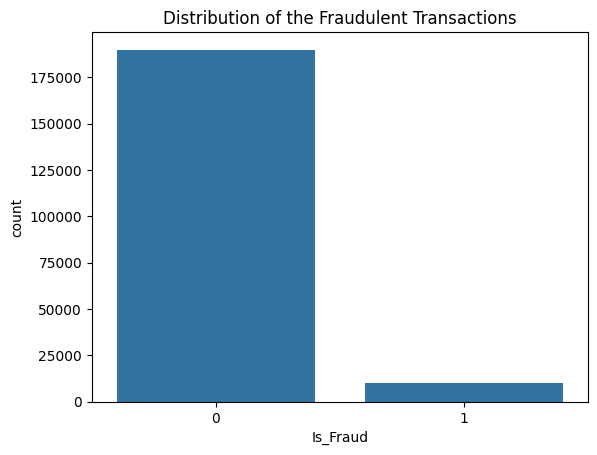

In [8]:
# Analyzing the target variable by checking distribution 
df["Is_Fraud"].value_counts(normalize = True)

# visualizing the distribution
sns.countplot(x = "Is_Fraud", data = df)
plt.title("Distribution of the Fraudulent Transactions")
plt.show()

In [9]:
df["Is_Fraud"].value_counts(normalize = True)

Is_Fraud
0    0.94956
1    0.05044
Name: proportion, dtype: float64

For the class 0 indicating (Non-fraud cases) which is 94.956% of the data while for class 1 (fraud cases) 5.044% of the data. This clearly shows s significant class imbalance, where the non-fraud cases vastly outnumbers the fraud cases.

In [10]:
# Analysis on how gender affects the fraud cases reported
df["Gender"].value_counts(normalize = True)

Gender
Male      0.50226
Female    0.49774
Name: proportion, dtype: float64

Which gender has been affected by Fraud cases.

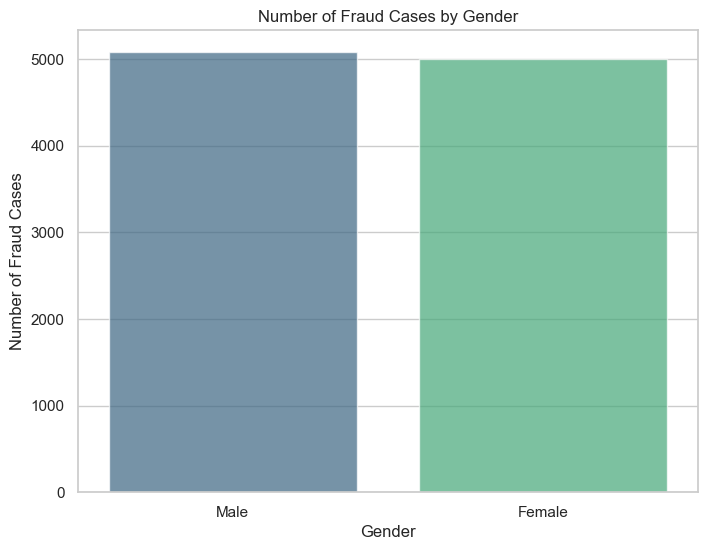

In [11]:
# Grouping the data by gender to get the number of fraud cases for each gender
gender_fraud = df[df["Is_Fraud"] == 1]['Gender'].value_counts()

# Creating a bar plot using seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_fraud.index, y=gender_fraud.values, palette="viridis", alpha=0.7)
plt.title('Number of Fraud Cases by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Fraud Cases')
plt.show()

 The male gender has a significantly higher number of fraud cases compared to the female which further suggest that the male gender are more targeted to fraud.

# Visualizing the distribution for the transaction amounts

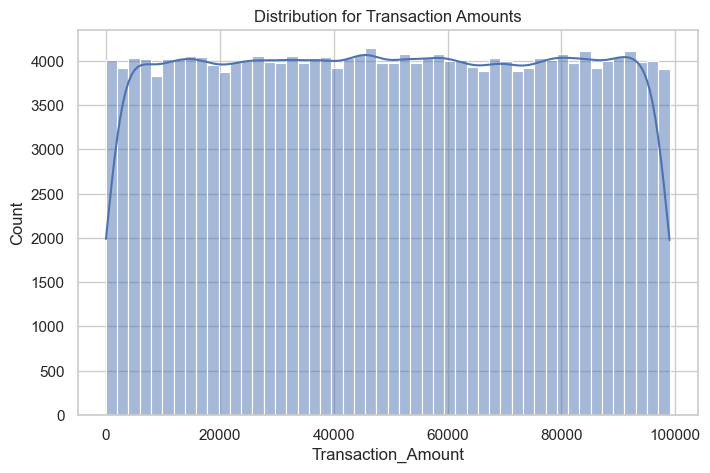

In [12]:
# Distribution of the transaction amounts
plt.figure(figsize = (8, 5))
sns.histplot(df["Transaction_Amount"], bins = 50, kde = True)
plt.title("Distribution for Transaction Amounts")
plt.show()

The Distribution of the transaction amounts appears to be uniformly distributed across the range which means that there all the values have equal likely to occur. There are also no significant peaks for the counts.


### Visualizing the Transaction amounts affected by Fraud

In [13]:
# Grouping the data to get the total transaction amount affected by fraud
fraud_transactions = df[df["Is_Fraud"] == 1]['Transaction_Amount'].sum()
non_fraud_transactions = df[df["Is_Fraud"] == 0]['Transaction_Amount'].sum()

# Creating a dictionary for visualization
data = {
    'Fraud Status': ['Fraud', 'Non-Fraud'],
    'Total Transaction Amount': [fraud_transactions, non_fraud_transactions]
}

# Creating a bar plot using Plotly
fig = px.bar(data, x='Fraud Status', y='Total Transaction Amount',
             title='Total Transaction Amount Affected by Fraud',
             labels={'Fraud Status': 'Fraud Status', 'Total Transaction Amount': 'Total Transaction Amount'},
             color='Fraud Status')

# Display the plot
fig.show()

From the visualization, its clear that the total transactions amount of 9.410487 Billion had non-fraud cases whereas for the case of Fraud, a total transactions amount of 497.1157 Million was reported cases of Fraud.

### Analyze the transaction type with the highest case of Fraud Reported.

The transaction type with the highest cases of fraud is: Transfer


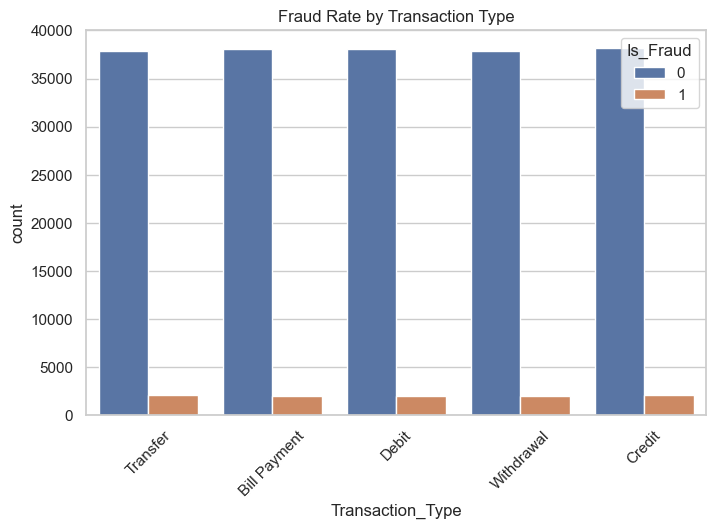

In [14]:
# Analyze the transaction type based on Fraud cases
fraud_counts = df[df['Is_Fraud'] == 1]['Transaction_Type'].value_counts()
highest_fraud_type = fraud_counts.idxmax()

# Print the transaction type with the highest cases of fraud
print(f"The transaction type with the highest cases of fraud is: {highest_fraud_type}")

# Create a visualization
plt.figure(figsize=(8, 5))
sns.countplot(x=df['Transaction_Type'], hue=df['Is_Fraud'])
plt.xticks(rotation=45)
plt.title("Fraud Rate by Transaction Type")
plt.show()

For transfer transactions are often done through online banking platforms which can be targeted by cyber criminals  using techniques such as phishing and malware attacks.

Transfers can also be vulnerable to insider threats, where employees with access to banking systems may engage in some fraudulent activties.

### Check the State with the highest Fraud Cases Reported

The state with the highest fraud cases is: Lakshadweep


<Figure size 1200x800 with 0 Axes>

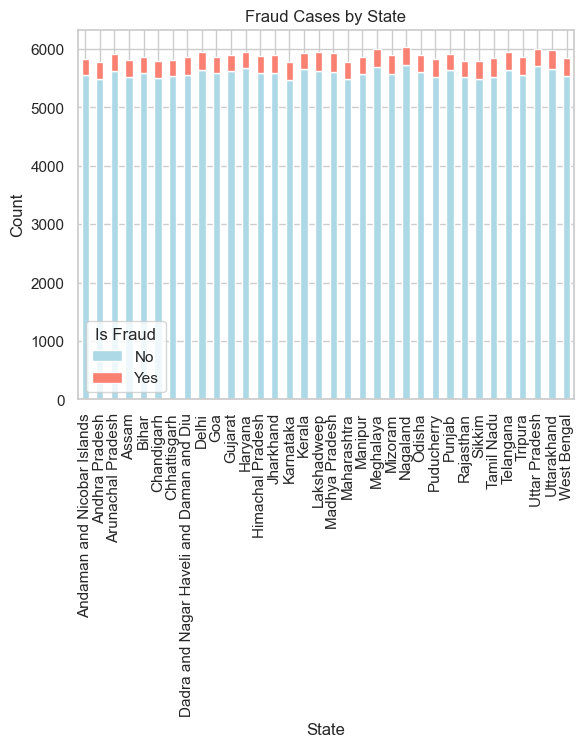

In [15]:
# Function to find the state with the highest fraud cases
def state_with_highest_fraud(df):
    fraud_counts = df[df['Is_Fraud'] == 1]['State'].value_counts()
    highest_fraud_state = fraud_counts.idxmax()
    return highest_fraud_state

# Function to plot fraud cases by state
def plot_fraud_by_state(df):
    plt.figure(figsize=(12, 8))
    state_fraud_counts = df.groupby(['State', 'Is_Fraud']).size().unstack()
    state_fraud_counts.plot(kind='bar', stacked=True, color=['lightblue', 'salmon'])
    plt.title('Fraud Cases by State')
    plt.xlabel('State')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.legend(title='Is Fraud', labels=['No', 'Yes'])
    plt.show()

# Find the state with the highest fraud cases
highest_fraud_state = state_with_highest_fraud(df)
print(f"The state with the highest fraud cases is: {highest_fraud_state}")

# Plotting the relationship
plot_fraud_by_state(df)

#### Correlation analysis

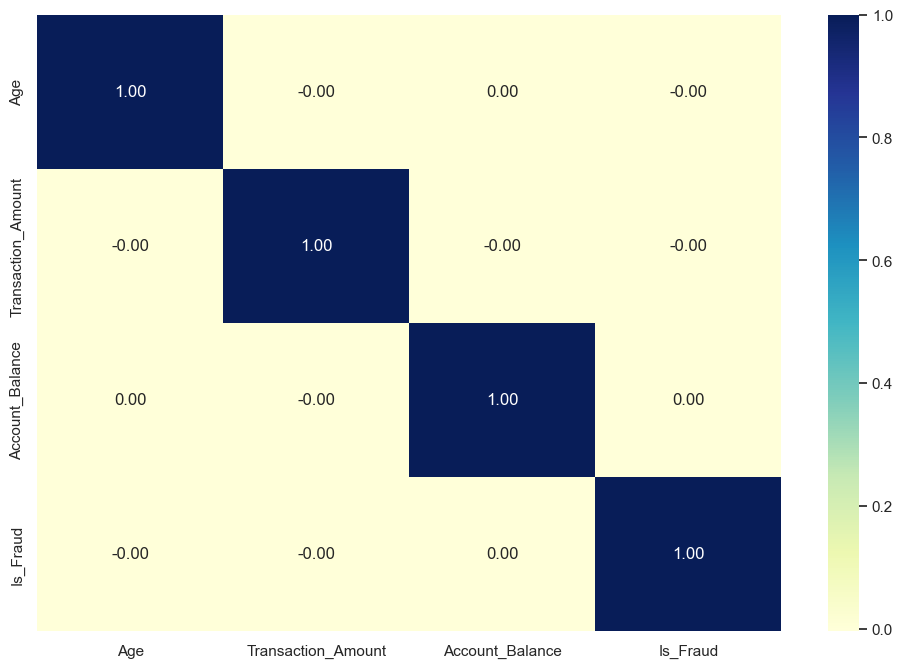

In [16]:
# Compute correlation for all numeric columns in DataFrames
corr_trained = df.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(corr_trained,annot=True,cmap="YlGnBu", fmt=".2f");


Here is the grouped data by Transaction Device and Fraud Status:
Is_Fraud                          0     1
Transaction_Device                       
ATM                           20167  1033
ATM Booth Kiosk               20067  1082
Bank Branch                    7480   375
Banking Chatbot                7617   378
Biometric Scanner              7523   429
Debit/Credit Card              7818   455
Desktop/Laptop                 7646   411
Mobile Device                  7482   397
POS Mobile App                 7477   391
POS Mobile Device              7600   406
POS Terminal                   7483   365
Payment Gateway Device         7452   422
QR Code Scanner                7527   411
Self-service Banking Machine  20650  1057
Smart Card                     7722   411
Tablet                         7652   407
Virtual Card                   7620   439
Voice Assistant                7627   412
Wearable Device                7729   399
Web Browser                    7573   408

The trans

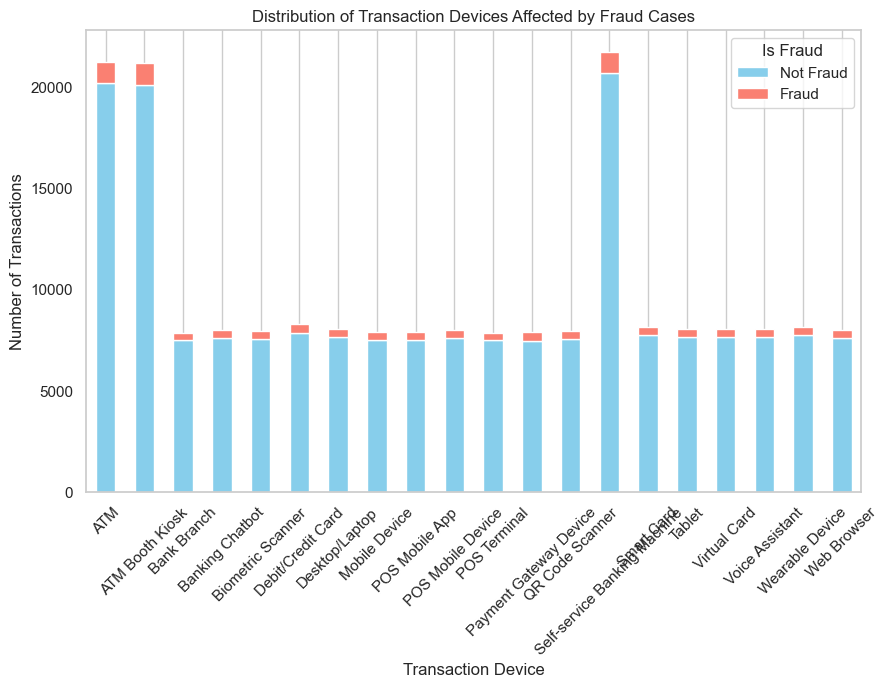

In [17]:
# Group the transaction devices and fraud status
grouped_data = df.groupby(['Transaction_Device', 'Is_Fraud']).size().unstack(fill_value=0)
print("\nHere is the grouped data by Transaction Device and Fraud Status:")
print(grouped_data)

# Find the transaction device with the highest fraud cases
highest_fraud_device = grouped_data[1].idxmax()
print(f"\nThe transaction device with the highest fraud cases is: {highest_fraud_device}")

# Plot the data
grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'salmon'])
plt.title('Distribution of Transaction Devices Affected by Fraud Cases')
plt.xlabel('Transaction Device')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.legend(title='Is Fraud', labels=['Not Fraud', 'Fraud'])
plt.grid(axis='y')

# Show the plot
plt.show()


The transaction device with the highest fraud cases is: ATM Booth Kiosk.
ATM Booth Kiosks are electronic devices that can be targeted by fraudsters. They may be vulnerable to skimming devices, where criminals attach a device to the ATM to capture card details and PIN numbers.
For the softwares running on ATM Booth Kiosks can be targeted by cyber criminals which tends to potentially allow fraudsters to manipulate transactions or even steal sensitive information.

# Data Preparation

In [18]:
# Remove columns not necessary to evaluate the mode performance
Cols_to_drop=["Customer_ID", "Customer_Name", "Transaction_ID","Merchant_ID", "Customer_Contact", "Customer_Email", "State", "City", "Transaction_Currency", "Transaction_Description"]
df1 = df.drop(columns=Cols_to_drop)

#print(df.shape)
print(f"The dataset has {df1.shape[0]} rows and {df1.shape[1]} columns")
df1.head()

The dataset has 200000 rows and 14 columns


,Gender,Age,Bank_Branch,Account_Type,Transaction_Date,Transaction_Time,Transaction_Amount,Transaction_Type,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud
0,Male,60,Thiruvananthapuram Branch,Savings,23-01-2025,16:04:07,32415.45,Transfer,Restaurant,74557.27,Voice Assistant,"Thiruvananthapuram, Kerala",POS,0
1,Female,51,Nashik Branch,Business,11-01-2025,17:14:53,43622.60,Bill Payment,Restaurant,74622.66,POS Mobile Device,"Nashik, Maharashtra",Desktop,0
2,Male,20,Bhagalpur Branch,Savings,25-01-2025,03:09:52,63062.56,Bill Payment,Groceries,66817.99,ATM,"Bhagalpur, Bihar",Desktop,0
3,Female,57,Chennai Branch,Business,19-01-2025,12:27:02,14000.72,Debit,Entertainment,58177.08,POS Mobile App,"Chennai, Tamil Nadu",Mobile,0
4,Female,43,Amritsar Branch,Savings,30-01-2025,18:30:46,18335.16,Transfer,Entertainment,16108.56,Virtual Card,"Amritsar, Punjab",Mobile,0


Gender
Female    5007
Male      5081
dtype: int64


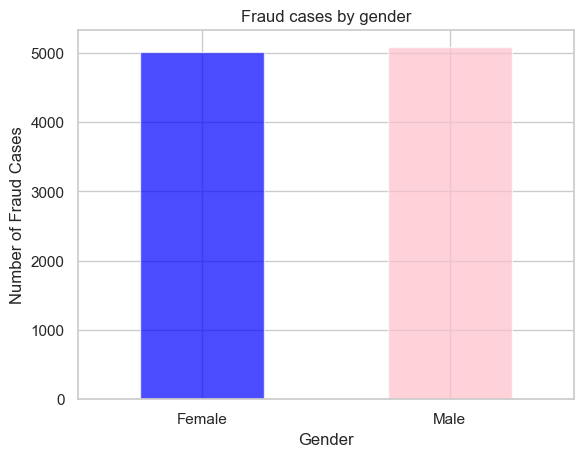

In [19]:
# Visualize which gender has been affected by fraud cases
# here lets group by gender to and count the number of fraud cases
fraud_gender = df1[df1['Is_Fraud'] == 1].groupby("Gender").size()
print(fraud_gender)

# plot the count of fraud cases by gender
fraud_gender.plot(kind = 'bar', color = ['blue', 'pink'], alpha = .7)
plt.title('Fraud cases by gender')
plt.xlabel('Gender')
plt.ylabel('Number of Fraud Cases')
plt.xticks(rotation = 0)
plt.show()


The fraud cases are almost equally distributed between males and females, however for the males they seem to constitute slightly higher percentage

From the analysis there seem to be a minor difference in the number of fraud cases between genders suggesting that the fraud occurences is relatively balanced across the genders.


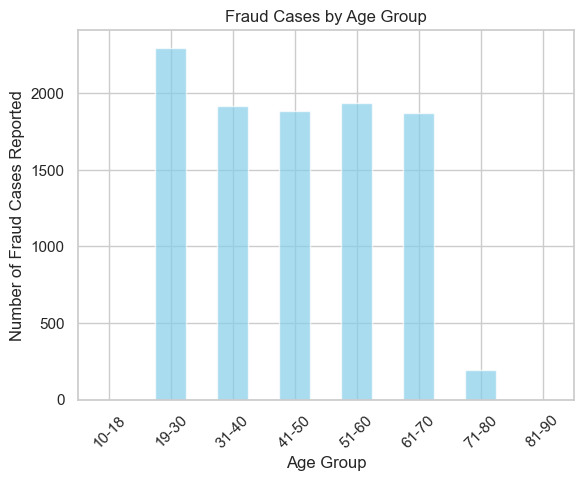

In [20]:
# Classify the age into bins for the ages affected by fraud.
bins = [10, 18, 30, 40, 50, 60, 70, 80, 90]
labels = ['10-18', '19-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90']
df1['age_group'] = pd.cut(df1['Age'], bins = bins, labels = labels, right = False)

# filter the DataFrame for fraud cases and group 
age_bins_fraud = df1[df1["Is_Fraud"] == True]['age_group'].value_counts().sort_index()

# plot the ages for each bin showing the fraud cases
age_bins_fraud.plot(kind = 'bar', color = 'skyblue', alpha = .7)
plt.title('Fraud Cases by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Fraud Cases Reported')
plt.xticks(rotation=45)
plt.show()

For customers at the age 19-30 and 51 - 60 show significantly higher numbers of fraud cases which further indicates that individuals in the age gropus are more vulnerable to fraud.



Possible Patterns:

If certain age groups show significantly higher numbers of fraud cases, it might indicate that individuals in those age groups are more targeted or more vulnerable to fraud.
For example, younger age groups (19-30) and middle-aged groups (31-40, 41-50) might show higher fraud cases due to higher online activity and financial transactions.


In [21]:
df1["Account_Type"].value_counts()

Account_Type
Checking    66924
Savings     66593
Business    66483
Name: count, dtype: int64

Account_Type  Is_Fraud  Transaction_Amount
Business      0         49676.893774          1
              1         49145.601315          1
Checking      0         49638.506099          1
              1         49797.408423          1
Savings       0         49339.967154          1
              1         48901.338818          1
Name: count, dtype: int64


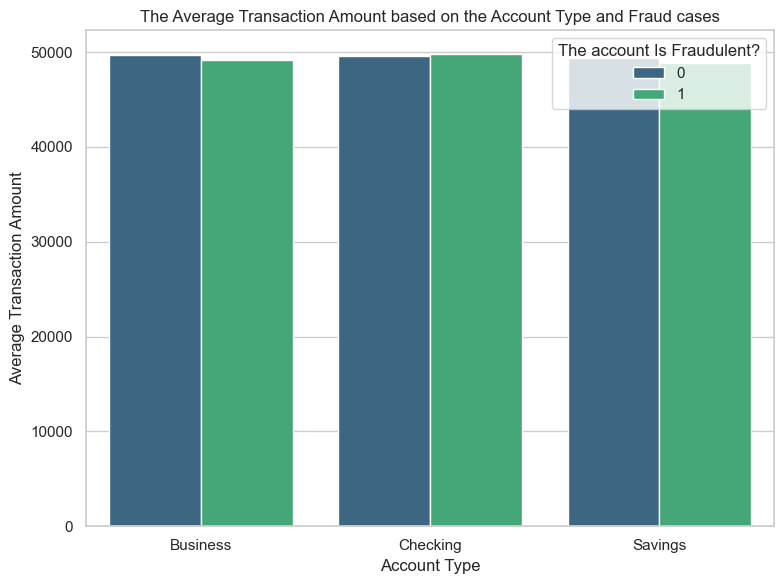

In [22]:
# classify the transactions amounts and the account type as Fraudulent 
grouped_data = df1.groupby(['Account_Type', 'Is_Fraud'])['Transaction_Amount'].mean().reset_index()
print(grouped_data.value_counts())

# visualize the grouped data
plt.figure(figsize = (8, 6))
sns.barplot(x = 'Account_Type', y = 'Transaction_Amount', hue = 'Is_Fraud', data = grouped_data, palette = 'viridis')
plt.title("The Average Transaction Amount based on the Account Type and Fraud cases")
plt.xlabel('Account Type')
plt.ylabel('Average Transaction Amount')
plt.legend(title = 'The account Is Fraudulent?')
plt.tight_layout()
plt.show()

In [23]:
# Get the most common Transaction method used by customers 
most_common_payment_method = df1['Transaction_Type'].mode()[0]
print("Most Common Payment Method:", most_common_payment_method)

Most Common Payment Method: Credit



Peak Fraud Period:
Start: 2025-01-08 18:00:00
End: 2025-01-08 19:00:00


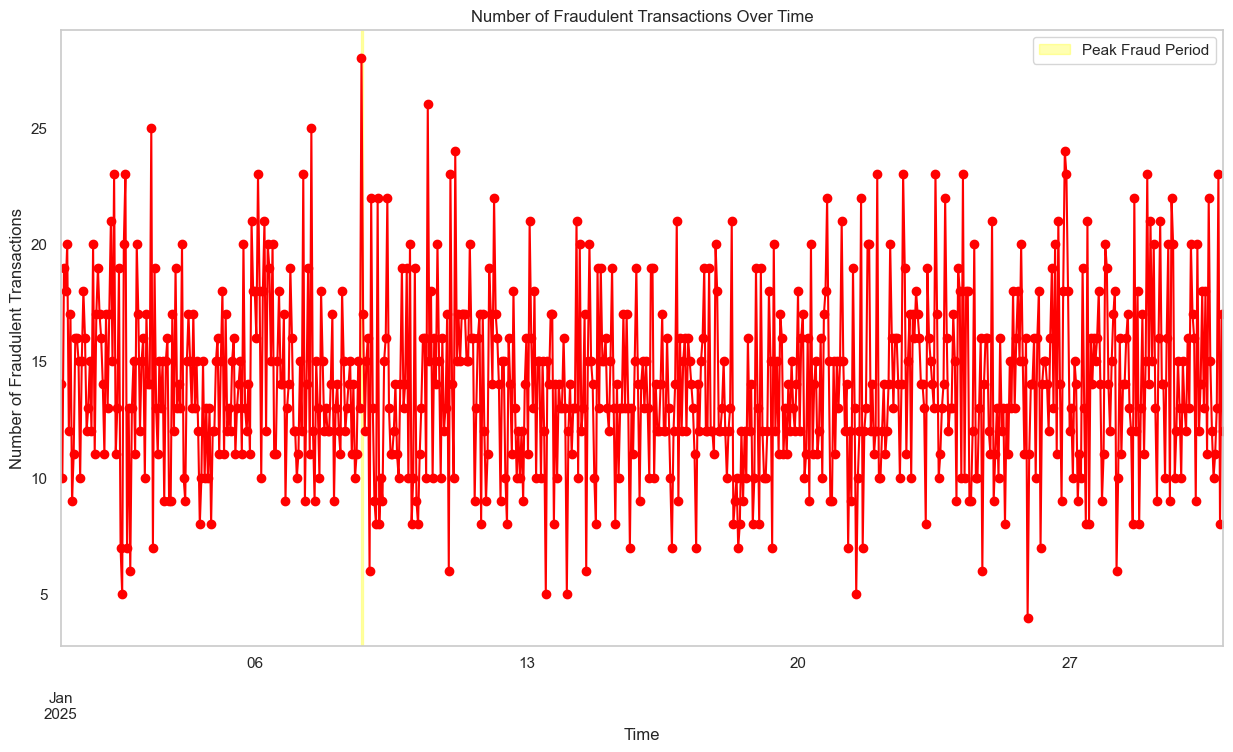

In [24]:
# Combine Transaction_Date and Transaction_Time into a single datetime column
df1['transaction_datetime'] = pd.to_datetime(df1['Transaction_Date'] + ' ' + df1['Transaction_Time'])

# Filter the dataset to include only fraudulent transactions
fraud_df = df1[df1['Is_Fraud'] == 1]

# Resample the data to count the number of frauds per hour
fraud_df.set_index('transaction_datetime', inplace=True)
fraud_counts = fraud_df.resample('H').size()

# Identify the peak fraud period
peak_period_start = fraud_counts.idxmax()
peak_period_end = peak_period_start + pd.Timedelta(hours=1)

print("\nPeak Fraud Period:")
print(f"Start: {peak_period_start}")
print(f"End: {peak_period_end}")

# Step 5: Visualize the fraud counts over time
plt.figure(figsize=(15, 8))
fraud_counts.plot(kind='line', marker='o', color='red')
plt.axvspan(peak_period_start, peak_period_end, color='yellow', alpha=0.3, label='Peak Fraud Period')
plt.title("Number of Fraudulent Transactions Over Time")
plt.xlabel("Time")
plt.ylabel("Number of Fraudulent Transactions")
plt.legend()
plt.grid()
plt.show()

# Create the Logistic Regression model as the baseline model

Select the features and target columns then perform split on the train and test

In [25]:
X = df1.drop(columns = ["Is_Fraud"], axis = 1)
y = df1["Is_Fraud"]

# split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

# check the shapes for both X_train and X_test 
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (160000, 15)
Shape of X_test: (40000, 15)


In [26]:
# Identifying numerical and categorical columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

In [27]:
# creating preprocessing transformers for numerical and categorical data
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown = "ignore")

# combine the transformers into the column transformers
preprocessor =  ColumnTransformer(
    transformers = [
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# create a pipeline that includes
pipeline = Pipeline(steps = [
    ('Preprocessor', preprocessor), 
    ('classifier', LogisticRegression())
])

In [28]:
# fitting the pipeline on the training data
pipeline.fit(X_train, y_train)

# get the prediction on the test data
y_pred = pipeline.predict(X_test)

# Evaluating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.948875

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     37955
           1       0.00      0.00      0.00      2045

    accuracy                           0.95     40000
   macro avg       0.47      0.50      0.49     40000
weighted avg       0.90      0.95      0.92     40000



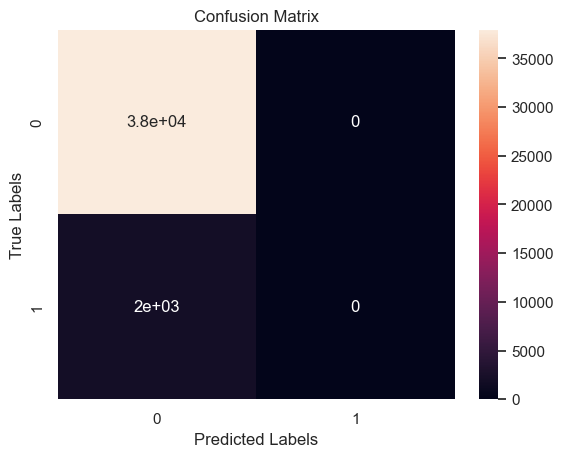

[[37955     0]
 [ 2045     0]]


In [29]:
# computing for the confusion matrix
cfn = confusion_matrix(y_test, y_pred)
sns.heatmap(cfn, annot = True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

print(cfn)

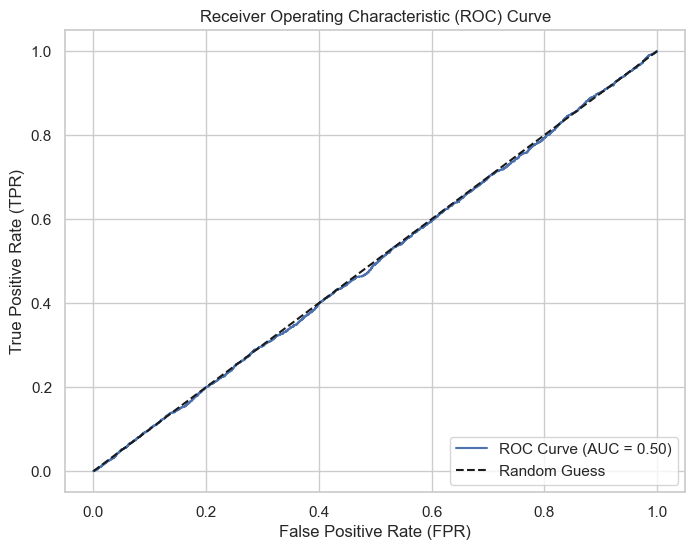

In [30]:
# Get the predicted probabilities for the positive class (class 1)
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Compute the AUC (Area Under the Curve)
auc = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Logistic Regression after Handling class imbalance

In [31]:
# Set the classifier in the pipeline to LogisticRegression
pipeline_lr = pipeline.set_params(classifier=LogisticRegression(class_weight='balanced', random_state=42))

# fit the pipeline to the training data
pipeline_lr.fit(X_train, y_train)

# check the prediction on the test data
y_pred_lr = pipeline_lr.predict(X_test)

# Evaluating the accuracy of the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy:", accuracy_lr)

# print the classification report 
print("\n Classification Report:")
print(classification_report(y_test, y_pred_lr))

Accuracy: 0.869825

 Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93     37955
           1       0.05      0.09      0.07      2045

    accuracy                           0.87     40000
   macro avg       0.50      0.50      0.50     40000
weighted avg       0.90      0.87      0.89     40000



# Changing the model to Random Forest

In [ ]:
# Update the classifier in the pipeline to include class_weight='balanced'
pipeline_rf = pipeline.set_params(classifier=RandomForestClassifier(class_weight='balanced', random_state=42))

# Fit the pipeline to the training data
pipeline_rf.fit(X_train, y_train)
# # fitting the pipeline on the training data
# pipeline_rf.fit(X_train, y_train)

# get the prediction on the test data
y_pred_rf = pipeline_rf.predict(X_test)

# Evaluating the accuracy of the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy_rf)


# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
# Compute for the ROC curve and ROC area for each class
y_score_rf = pipeline_rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_score_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curve
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# # calculates the class imbalance ratio and assigns it to scale_pos_weight in XGBoostClassifier
# ratio = float(np.sum(y_train == 0)) / np.sum(y_train == 1)
# model = xgb.XGBClassifier(scale_pos_weight=ratio, random_state=42)
# model

# XGBoost model

In [ ]:
pipeline_xgb = pipeline.set_params(classifier = XGBClassifier(scale_pos_weight = 1, random_state = 42))
# Fit the pipeline to the training data
pipeline_xgb.fit(X_train, y_train)
# fitting the pipeline on the training data
pipeline_xgb.fit(X_train, y_train)

# get the prediction on the test data
y_pred_xgb = pipeline_xgb.predict(X_test)

# Evaluating the accuracy of the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("Accuracy:", accuracy_xgb)


# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))


Accuracy: 0.948875

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     37955
           1       0.00      0.00      0.00      2045

    accuracy                           0.95     40000
   macro avg       0.47      0.50      0.49     40000
weighted avg       0.90      0.95      0.92     40000



In [ ]:
# # calculates the class imbalance ratio and assigns it to scale_pos_weight in XGBoostClassifier
# ratio = float(np.sum(y_train == 0)) / np.sum(y_train == 1)
# model = xgb.XGBClassifier(scale_pos_weight=ratio, random_state=42)
# model

# Decision Tree model

In [ ]:
pipeline_dt = pipeline.set_params(classifier = DecisionTreeClassifier(class_weight='balanced', random_state=42))
# Fit the pipeline to the training data
pipeline_dt.fit(X_train, y_train)
# fitting the pipeline on the training data
pipeline_dt.fit(X_train, y_train)

# get the prediction on the test data
y_pred_dt = pipeline_dt.predict(X_test)

# Evaluating the accuracy of the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy:", accuracy_dt)


# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

Accuracy: 0.8703

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93     37955
           1       0.05      0.08      0.06      2045

    accuracy                           0.87     40000
   macro avg       0.50      0.50      0.50     40000
weighted avg       0.90      0.87      0.89     40000



# Fine Tuning the Random Forest Classifier

In [ ]:
# Define the parameter grid for GridSearchCV
param_grid_xgb = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 5, 7],
    'classifier__subsample': [0.6, 0.8, 1.0]
}

# Create the GridSearchCV 
grid_search_xgb = GridSearchCV(estimator=pipeline_xgb, param_grid=param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search_xgb.fit(X_train, y_train)


ValueError: Invalid parameter 'learning_rate' for estimator DecisionTreeClassifier(class_weight='balanced', random_state=42). Valid parameters are: ['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'].

In [ ]:
# Set the best estimator as the final model
pipeline_xgb_final = grid_search_xgb.best_estimator_

# Fit the final model to the training data
pipeline_xgb_final.fit(X_train, y_train)

# Get the prediction on the test data
y_pred_xgb = pipeline_xgb_final.predict(X_test)

# Evaluating the accuracy of the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("Accuracy:", accuracy_xgb)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

# Print best parameters
print("\nBest Parameters:")
print(grid_search_xgb.best_params_)

NameError: name 'grid_search_xgb' is not defined

# Tuning the 

# Recommendations
* Risk Assessment:

Understanding the distribution of fraud cases by age group can aid in risk assessment and the development of targeted fraud prevention strategies.
Financial institutions and security agencies can use this information to implement age-specific awareness campaigns and security measures.

* Targeted Fraud Prevention:

Understanding the distribution of fraud cases by gender can help in designing targeted fraud prevention strategies.
For example, if females have a higher number of fraud cases, awareness campaigns and security measures can be tailored specifically for female users.